# ENGR 1330 – Computational Thinking and Data Science

## Machine Learning

Machine learning (ML) is the process of  building algorithms that are capable of ‘learning’ from data. ML takes a dataset and attempts to fit a model to the data such that the model can make accurate predictions on data that is either unknown or to fill in missing parts of the data. An example of this would be using ML to predict what videos a user might want to watch based on what they viewed previously. 

The purpose of a Machine learning system is to:
- Fit a model to a dataset 
- Use the model to make predictions about the future
- Use the model to fill in missing data 

This project will develop scripts to train a machine learning model. 

### Background
Scikit will be used to generate and train the model along with making the predictions. Scikit is a common machine learning library and is a good place to start learning about machine learning. The model type for this project will be Support Vector Machine (SVM) that takes in a vector with each element of the vector representing a variable. 

To learn more about Scikit SVM models read the documentation found here:
https://scikit-learn.org/stable/modules/svm.html#svm

## Objective(s):
- Train a model using prvided dataset with a 80/20 training/validation split.
- test your model against the validation set
- predict the future

## Presentation
Prepare a 5-8 min presentation that will be given to the class. 
The presentation should include:
- Description of the dataset used
- Histogram of the weights
- A graph of the data and model
- Accuracy of the model when tested against the validation set
- Graph of the data along with the predicted data
- Predict data using an x that you come up with that is not included in the data
- Expect to be asked questions about the data and model as well as what variables played the largest role.

## Submission 
- Your presentation slides, jupyter notebook, and pdf of the jupyter notebook must be submitted BEFORE the your present.

## Libraries 
- numpy
- pandas
- matplotlib
- scikit

## Data
- using statistics and graphs describe your data

In [1]:
# importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# read in the data
df = pd.read_csv('/Users/aakashbora/downloads/Real_Estate_Sales_2001-2020_GL.csv')
df

/var/folders/zb/f7d1w1ds71bbs2ms1svftm6r0000gn/T/ipykernel_53898/1782766368.py:8: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/aakashbora/downloads/Real_Estate_Sales_2001-2020_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN


In [2]:
#removing all the data which is not necessary for the model from the dataframe
sales = df.copy()
sales = sales.iloc[:, [1,3,5,6,7,9]]

#Selecting a specific town (Bristol) for prediction
Bristol = sales[sales['Town']=='Bristol']

#Slecting only the significant values in the Residential Type column (Single Family and Condo)
templist = ['Single Family', 'Condo']
Bristol = Bristol[Bristol['Residential Type'].isin(templist)]

#Dropping the outliers
Bristol = Bristol[Bristol['Assessed Value'] < 300000 ]

#Dropping the NaN values from the dataframe
Bristol = Bristol.dropna()

In [3]:
# Produce descriptive statistics of the data
Bristol.describe()

,List Year,Assessed Value,Sale Amount,Sales Ratio
count,8985.000000,8985.000000,8985.000000,8985.000000
mean,2013.862104,120754.824151,180363.076920,0.825954
std,4.653393,47256.922139,80067.935182,1.663005
min,2006.000000,0.000000,2000.000000,0.000000
25%,2009.000000,90860.000000,126000.000000,0.568769
50%,2014.000000,116830.000000,172000.000000,0.675300
75%,2018.000000,145670.000000,227000.000000,0.800154
max,2020.000000,299320.000000,610000.000000,74.051000


In [4]:
Bristol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8985 entries, 14 to 981871
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   List Year         8985 non-null   int64  
 1   Town              8985 non-null   object 
 2   Assessed Value    8985 non-null   float64
 3   Sale Amount       8985 non-null   float64
 4   Sales Ratio       8985 non-null   float64
 5   Residential Type  8985 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 491.4+ KB


<AxesSubplot:xlabel='Assessed Value', ylabel='List Year'>

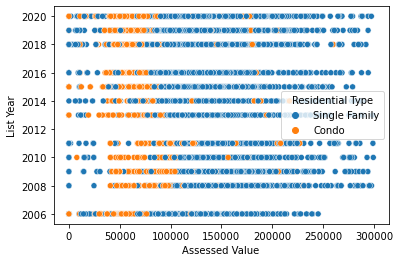

In [5]:
#plotting a graph of the data and the model
sns.scatterplot(x=Bristol['Assessed Value'], y =Bristol['List Year'] 
                ,data = Bristol, hue = 'Residential Type')

In [6]:
from sklearn import preprocessing
from sklearn import utils

#Creating a new column in the dataframe names 'Res Label' and 
    #saving all single family as 1s and condos as 0s
lab = preprocessing.LabelEncoder()
ResLabel = lab.fit_transform(Bristol['Residential Type'])
Bristol["Res Label"] = ResLabel

In [7]:
#Assigning x and y to the model
X_columns = Bristol[['Assessed Value', 'List Year']]

x = np.asarray(X_columns)

y = np.asarray(Bristol['Res Label'])

Text(0, 0.5, 'count')

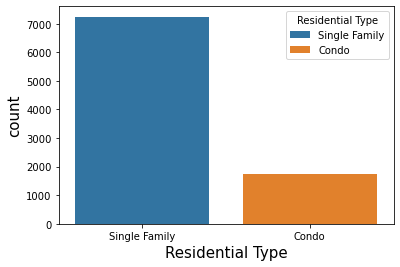

In [8]:
ax = sns.countplot(x='Residential Type', hue='Residential Type', dodge=False, data = Bristol)
ax.set_xlabel('Residential Type', fontsize=15, color='black')
ax.set_ylabel('count', fontsize=15, color='black')

## Machine Learning
- use the code to generate a model
- start by pick data to use as your x and y
- split your data into a training set (80) and a validation set (20)

In [9]:
# split the data into data_train and data_val

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 4)

x = X_train
y = y_train

In [10]:
# save your x and y for the training/validation sets
# use x_train/y_train and x_val,y_val

from sklearn import svm
model = svm.SVC(kernel = 'linear', C= 10, gamma = 10)
model.fit(x, y)

y_predict = model.predict(X_test)
y_predict.shape

(1797,)

## Machine Learning Testing
- use a loop to test your model against the validation set you created
- make a graph with a scater plot of the data and a plot of the model

In [11]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_predict)
print('The Accuracy % is:', acc * 100)

The Accuracy % is: 84.36282693377852


In [12]:
#Calculating the error
#Error is 1-Accuracy
error = 1 - acc
print('The error percentage is =', error*100)

The error percentage is = 15.637173066221477


In [13]:
#Display Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 105,  246],
       [  35, 1411]])

In [14]:
#Comparing the actual vs predicted value
#1s are single family and 0s are condos
df_scores = pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
df_scores.loc[20:30]

,Actual,Predicted
20,1,1
21,1,1
22,1,0
23,1,1
24,1,1
25,1,1
26,1,1
27,1,1
28,0,1
29,1,1


In [27]:
# use the model to make a prediction about an unknown
a = model.predict(([[325000, 2029], [45000, 2025], [255000, 2005], [35000, 2009], [178000, 2022], [358000, 2030]]))
print (a)

[1 0 1 0 1 1]


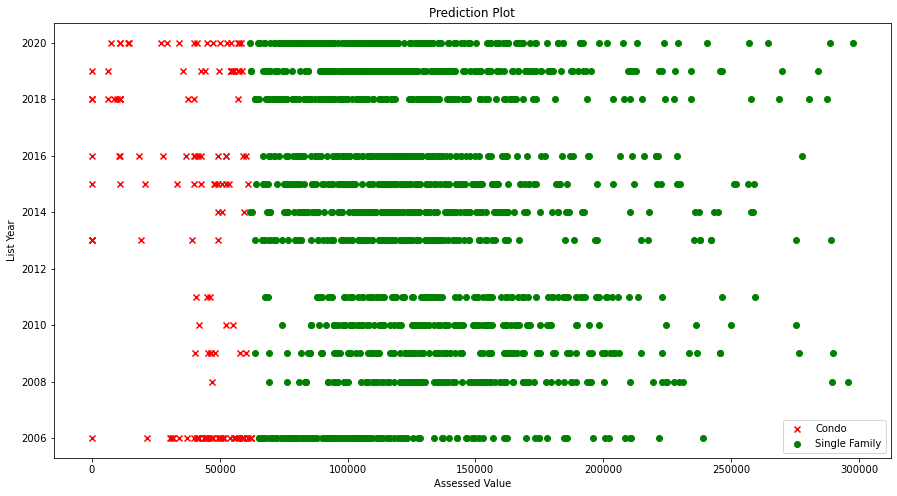

In [16]:
#Plotting a prediction graph
plt.figure(figsize=(15, 8))

Condo = np.where(y_predict == 0)
Condo = Condo[0].tolist()

SingleFamily = np.where(y_predict == 1)
SingleFamily= SingleFamily[0].tolist()

Cond = X_test[Condo, :]
Single = X_test[SingleFamily, :]

plt.xlabel('Assessed Value')
plt.ylabel('List Year')

figure = plt.scatter(Cond[:,0], Cond[:,1], color = 'red', marker ='x', label='Condo')
plt.scatter(Single[:,0], Single[:,1], color = 'green', marker ='o', label='Single Family')

plt.title('Prediction Plot')
plt.legend()